In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

mpl.rc('font', family='Malgun Gothic')

In [2]:
df1_detect = pd.read_csv('09_Detection.csv')
df1_process = pd.read_csv('09_Process_A.csv')

In [3]:
df1_process.head(3)

,Unnamed: 0,Unnamed: 0.1,DATE,PERIOD,Label,A1,A2,A3,A4,A5,A6
0,0,0,2018-12-01T00:10:00,P1,AVG,225.637279,228.533316,230.788205,230.634245,232.112927,230.630909
1,1,1,2018-12-01T00:20:00,P1,AVG,225.763044,228.519014,230.428961,230.936762,231.899435,230.564272
2,2,2,2018-12-01T00:30:00,P1,AVG,225.637431,228.040479,230.276102,230.359142,231.650512,230.317974


In [4]:
df1_detect.head(3)

,Unnamed: 0,date_clean,tag,tag_num,unit,Y1A,Y2A,Y3A
0,0,2018-12-01 03:30:00.000,NE280V,GO1701,Total [1/m²],4954.774,327.416,256.882
1,1,2018-12-01 07:30:00.005,NE280PV,GO1701,Total [1/m²],2281.460,44.410,17.416
2,2,2018-12-01 11:30:00.010,NE280V,GO1701,Total [1/m²],4453.201,74.017,23.511


In [5]:
df1_process['datetime'] = pd.to_datetime(df1_process['DATE'])
df1_detect['datetime'] = pd.to_datetime(df1_detect['date_clean'])

In [6]:
df1_detect['dt_round'] = df1_detect['datetime'].round('T')

In [7]:
df1_process_30T = df1_process.set_index('datetime').resample('30T').mean()
df1_process_T = df1_process_30T.reset_index()

In [8]:
df1 = pd.merge(df1_process_T, df1_detect, 
               left_on='datetime', right_on='dt_round', how='inner')

# Mission 9

- df1 데이터를 이용해 아래의 문제를 해결하고자 한다. 
1. 'tag'항목의 각 값들의 빈도수를 계산 

In [9]:
df1['tag'].value_counts()

NE280PV    373
NE282PV     74
E280PV      13
NE280V      13
Name: tag, dtype: int64

2. 'Y1A'에서 3000이상인 값을 추출하여, 높은 순서대로 정렬한 뒤, tag별 A1값의 평균을 계산 

In [10]:
df1.sort_values(by='Y1A', ascending=False, inplace=True)
cond1 = (df1['Y1A'] >= 3000)
df1_Y1A_top = df1.loc[cond1]
df1_Y1A_top.pivot_table(index='tag', values='A1', aggfunc='mean')

,A1
tag,
E280PV,176.522720
NE280PV,230.525440
NE280V,228.820843
NE282PV,230.657998


3. 'dt_round'값을 이용해, 연도/월/일자 를 추출하여 새로운 변수로 선언 Year/Month/Day

In [11]:
df1['Year'] = df1['dt_round'].dt.year
df1['Month'] = df1['dt_round'].dt.month
df1['Day'] = df1['dt_round'].dt.day

4. 'Day'별 'Y1A의 합을 계산 (Pivot Table 활용) 

In [12]:
df1.pivot_table(index='Day', values='Y1A', aggfunc='sum')

,Y1A
Day,
1,126511.524
2,91771.302
3,289396.886
4,125731.877
5,144191.586
6,87539.926
7,77805.043
8,81396.942
9,35236.577


5. 'tag'항목에서 NE282PV 항목을 추출하여, 'dt_round'를 **일별**로 A1~A6 값의 평균을 계산 (Resample 이용해 계산, 아래와 같은 결과가 도출 되게 끔 )
![image-2.png](attachment:image-2.png)

In [13]:
cond1 = (df1['tag']=='NE282PV')
df = df1.loc[cond1].set_index('dt_round').resample('D').mean()[['A1', 'A2', 'A3', 'A4','A5', 'A6']].dropna()
df

,A1,A2,A3,A4,A5,A6
dt_round,,,,,,
2018-12-31,229.590635,230.662697,231.783269,230.581694,230.047135,228.058751
2019-01-14,230.820579,232.088655,233.016918,232.093023,231.618933,229.559233
2019-01-15,230.923918,231.898059,233.000520,231.602043,231.059655,228.953803
2019-01-16,229.748754,230.840738,231.995553,230.715121,230.204467,228.094464
2019-01-17,231.317947,232.260641,232.989705,231.925774,231.203691,229.096735
2019-01-19,229.235814,232.185980,234.400608,234.196921,234.559251,232.722947
2019-01-20,226.194814,229.397951,232.025752,232.183624,233.008756,231.314809
2019-01-21,231.314295,233.707146,235.510813,234.846598,234.621040,232.629906
2019-01-25,229.602128,231.479119,233.073132,232.318212,232.230424,230.311868


6. 위에서 계산한 데이터 테이블에 결측값을 제거하여 df1_clean으로 선언한뒤, 상위 30개 데이터를 뽑아, A5 값에 대한 Xbar-σ 관리도를 시각화 하시오.

In [14]:
df1_A5 = df.sort_values(by='A5', ascending=False).head(30)
df1_A5.reset_index(inplace=True)
df1_A5.reset_index(inplace=True)
df1_A5

,index,dt_round,A1,A2,A3,A4,A5,A6
0,0,2019-01-21,231.314295,233.707146,235.510813,234.846598,234.621040,232.629906
1,1,2019-01-19,229.235814,232.185980,234.400608,234.196921,234.559251,232.722947
2,2,2019-01-20,226.194814,229.397951,232.025752,232.183624,233.008756,231.314809
3,3,2019-06-09,235.775894,235.962762,235.574939,234.581260,232.820007,230.591804
4,4,2019-08-31,232.750798,233.945584,234.064988,233.674013,232.383873,230.342291
5,5,2019-08-30,233.151003,234.233224,234.195504,233.795056,232.303811,230.197380
6,6,2019-01-25,229.602128,231.479119,233.073132,232.318212,232.230424,230.311868
7,7,2019-01-26,229.968473,231.751107,233.226857,232.382566,232.173861,230.260425
8,8,2019-06-07,234.720298,234.949333,234.652680,233.624243,232.075472,229.799864
9,9,2019-01-14,230.820579,232.088655,233.016918,232.093023,231.618933,229.559233


In [15]:
df1_A5['Center'] = df1_A5['A5'].mean()
df1_A5['UCL'] = df1_A5['A5'].mean() + df1_A5['A5'].std() * 3
df1_A5['LCL'] = df1_A5['A5'].mean() - df1_A5['A5'].std() * 3

<AxesSubplot:xlabel='index', ylabel='A5'>

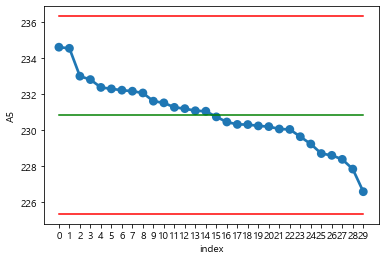

In [16]:
sns.pointplot(data=df1_A5, x='index', y='A5')
sns.lineplot(data=df1_A5, x='index', y='Center', color='g')
sns.lineplot(data=df1_A5, x='index', y='UCL', color='r')
sns.lineplot(data=df1_A5, x='index', y='LCL', color='r')